<a href="https://colab.research.google.com/github/ApssaraGanesh/AIML_CODEBASE/blob/TASK1/OLM__Email_subject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install evaluate sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 37.8 MB/s eta 0:00:00


In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=b977bfc5e25d316feb90492952a51ddc7f2bae57b4e1b78ab165093e042686d3
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
!pip install transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.0 MB/s eta 0:00:00


In [ ]:
import os
import math
import random
import torch
import evaluate
import numpy as np
import pandas as pd
import  seaborn as sns
from matplotlib import pyplot as plt



from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import LineByLineTextDataset
from transformers import DataCollatorForLanguageModeling
from transformers import GPT2Tokenizer,GPT2LMHeadModel
from transformers import Trainer,TrainingArguments

In [ ]:
DOWN_DATA_PATH = '/content/drive/MyDrive/Capstone/Dataset/AESLC-master/AESLC-master/enron_subject_line'
LINES_DATA_PATH = 'enron_lines'
MODEL_KEY = 'olm/olm-gpt2-dec-2022'
EXP_NAME = f'enron-subgen-{MODEL_KEY}'


SEED_VALUE = 15
LEARNING_RATE = 1e-5
TRAIN_BATCH_SIZE = 8
EVAL_BATCH_SIZE = 2 * TRAIN_BATCH_SIZE
N_EPOCHS = 18

In [ ]:
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
torch.manual_seed(SEED_VALUE)

In [ ]:
os.makedirs(LINES_DATA_PATH,exist_ok=True)
def prepare_train_dataset(down_data_path,lines_data_path,split):
    with open(os.path.join(lines_data_path,f'{split}.txt'),'w') as writer:
        filenames = os.listdir(os.path.join(down_data_path,split))
        for filename in filenames:
            with open(os.path.join(down_data_path,split,filename),'r') as reader:
                email,subject = reader.read().split('@subject')
                email = ' '.join(email.replace('\n',' ').split()).strip()
                subject = ' '.join(subject.replace('\n',' ').split()).strip()
                sequence = '<email>' + email + '<subject>' + subject
                writer.write(sequence + '\n')

    return



In [ ]:
def prepare_validation_dataset(down_data_path,lines_data_path,split):
    with open(os.path.join(lines_data_path,f'{split}.txt'),'w') as writer:
        filenames = os.listdir(os.path.join(down_data_path,split))
        for filename in filenames:
            with open(os.path.join(down_data_path,split,filename),'r') as reader:
                email,email_right = reader.read().split('@subject')
                subject,subject_right  = email_right.split('@ann0')
                ann0,ann0_right = subject_right.split('@ann1')
                ann1,ann2 = ann0_right.split('@ann2')


                email = ' '.join(email.replace('\n',' ').split()).strip()
                subject = ' '.join(subject.replace('\n',' ').split()).strip()
                ann0 = ' '.join(ann0.replace('\n',' ').split()).strip()
                ann1 = ' '.join(ann1.replace('\n',' ').split()).strip()
                ann2 = ' '.join(ann2.replace('\n',' ').split()).strip()
                sequence = '<email>' + email + '<subject>' + subject + '<ann0>' + ann0 + '<ann1>' + ann1 + '<ann2>' + ann2
                writer.write(sequence + '\n')

    return

In [ ]:
prepare_train_dataset(DOWN_DATA_PATH,LINES_DATA_PATH,'train')


In [ ]:
prepare_validation_dataset(DOWN_DATA_PATH,LINES_DATA_PATH,'dev')


In [ ]:
!pip install wandb

In [ ]:
wandb.login(key='50eca2cdb5723bc91f125b5378cfb6ce37ea4fab')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import wandb
wandb.init(project = 'EmailSubject')

wandb: Currently logged in as: apssarag (aimlteam4). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.15.10
wandb: Run data is saved locally in /content/wandb/run-20230916_085026-lmt6vsy1
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run happy-valley-8
wandb: ⭐️ View project at https://wandb.ai/aimlteam4/EmailSubject
wandb: 🚀 View run at https://wandb.ai/aimlteam4/EmailSubject/runs/lmt6vsy1


In [ ]:
prepare_validation_dataset(DOWN_DATA_PATH,LINES_DATA_PATH,'test')

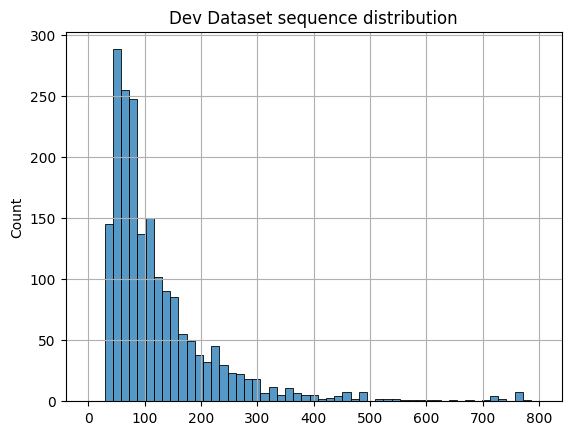

In [ ]:
with open(os.path.join(LINES_DATA_PATH,'dev.txt'),'r') as f:
    dev_lines = f.readlines()
dev_seq_lens = np.array([len(line.split()) for line in dev_lines])
sns.histplot(dev_seq_lens,binrange=(0,800))
plt.grid()
plt.title('Dev Dataset sequence distribution')
plt.show()

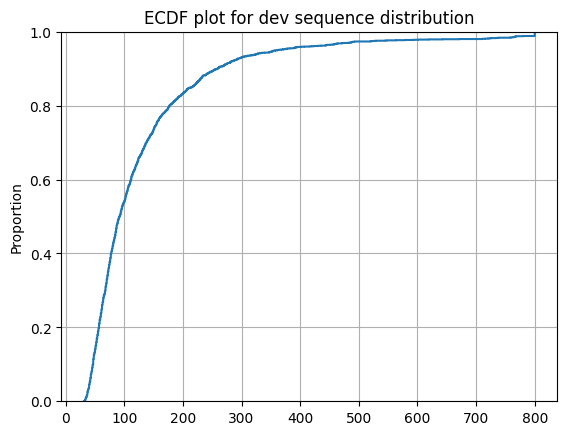

In [ ]:
sns.ecdfplot(np.clip(dev_seq_lens,a_min=0,a_max=800))
plt.grid()
plt.title('ECDF plot for dev sequence distribution')
plt.show()

In [ ]:
dev_seq_lens.mean(),dev_seq_lens.std(),np.median(dev_seq_lens),dev_seq_lens.min(),dev_seq_lens.max()

(139.25408163265305, 165.1421920824271, 92.0, 31, 2708)

In [ ]:
def load_dataset(file_path,tokenizer):
    block_size = 256 if 'train' in file_path else 512

    dataset = LineByLineTextDataset(
             tokenizer=tokenizer,
             file_path=file_path,
             block_size=block_size
    )
    return dataset

In [ ]:
def load_data_collator(tokenizer,mlm=False):
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=mlm
    )
    return data_collator

In [ ]:
from transformers import AutoTokenizer, RobertaModel
import torch
tokenizer= GPT2Tokenizer.from_pretrained(MODEL_KEY)
tokenizer.add_special_tokens({'pad_token':'{PAD}'})

model = GPT2LMHeadModel.from_pretrained(MODEL_KEY)
model.resize_token_embeddings(len(tokenizer))

type(tokenizer),type(model)


You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 50266. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


(transformers.models.gpt2.tokenization_gpt2.GPT2Tokenizer,
 transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel)

In [ ]:
n_model_params = 0
for p in model.parameters():
    n_model_params += p.numel()

print(f' *parameters in LM Head Model {MODEL_KEY}:{n_model_params}')

 *parameters in LM Head Model olm/olm-gpt2-dec-2022:124446720


In [ ]:
train_dataset=load_dataset(os.path.join(LINES_DATA_PATH,'train.txt'),tokenizer)
dev_dataset=load_dataset(os.path.join(LINES_DATA_PATH,'dev.txt'),tokenizer)
test_dataset=load_dataset(os.path.join(LINES_DATA_PATH,'test.txt'),tokenizer)




/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:119: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
data_collator=load_data_collator(tokenizer)

In [ ]:
len(train_dataset),len(dev_dataset),len(test_dataset)

(14446, 1960, 1906)

In [ ]:
bleu = evaluate.load('bleu')
rouge = evaluate.load('rouge')
#meteor = evaluate.load('meteor')


def preprocess_logits_for_metrics(logits, labels):
    pred_ids = torch.argmax(logits, dim=-1)

    return pred_ids, labels



def compute_metrics(eval_preds):
    logits, labels = eval_preds
    preds = logits[0]
    preds = np.where(preds!= -100,preds, tokenizer.pad_token_id)
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    sequences = tokenizer.batch_decode(labels, skip_special_tokens=True)

    prompts = list()
    references = list()
    for sequence in sequences:
        try:
            prompt, ref_text = sequence.split('<subject>')
            prompt += '<subject>'
            subject, subject_right = ref_text.split('<ann0>')
            ann0, ann0_right = subject_right.split('<ann1>')
            ann1, ann2 = ann0_right.split('<ann2>')
            prompts.append(prompt)
            references.append([subject, ann0, ann1, ann2])
        except ValueError:
            continue

    tokenizer.padding_side='left'
    n_batches = math.ceil(len(prompts)*1.0 / EVAL_BATCH_SIZE)
    outputs = list()
    for i in range(n_batches):
        prompts_batch = prompts[i*EVAL_BATCH_SIZE : (i+1)*EVAL_BATCH_SIZE]
        prompts_batch_ids = tokenizer(prompts_batch,
            padding=True, truncation=True, return_tensors='pt').to(model.device)
        output_ids = model.generate(
            **prompts_batch_ids, max_new_tokens=10,
            pad_token_id=tokenizer.pad_token_id)
        outputs_batch = [seq.split('<subject>')[1] for seq in
            tokenizer.batch_decode(output_ids, skip_special_tokens=True)]
        outputs.extend(outputs_batch)
    tokenizer.padding_side='right'

    bleu_score = bleu.compute(predictions=outputs, references=references)
    rouge_score = rouge.compute(predictions=outputs, references=references)
    #meteor_score = meteor.compute(predictions=outputs, references=references)
    wandb.log({
        'BLEU': round(bleu_score['bleu'], 4) * 100,
        'R1': round(rouge_score['rouge1'], 4) * 100,
        'R2': round(rouge_score['rouge2'], 4) * 100,
        'RL': round(rouge_score['rougeL'], 4) * 100,
        'RLsum': round(rouge_score['rougeLsum'], 4) * 100
        #'METEOR': round(meteor_score['meteor'], 4) * 100
        })
    return {
        'BLEU': round(bleu_score['bleu'], 4) * 100,
        'R1': round(rouge_score['rouge1'], 4) * 100,
        'R2': round(rouge_score['rouge2'], 4) * 100,
        'RL': round(rouge_score['rougeL'], 4) * 100,
        'RLsum': round(rouge_score['rougeLsum'], 4) * 100
        #'METEOR': round(meteor_score['meteor'], 4) * 100
        }


In [ ]:
training_args = TrainingArguments(
          output_dir=EXP_NAME,
          overwrite_output_dir=True,
          evaluation_strategy = 'steps',
          eval_steps = 1000,
          max_steps = 10000,
          learning_rate=LEARNING_RATE,
          save_strategy = 'epoch',
          per_device_train_batch_size=TRAIN_BATCH_SIZE,
          per_device_eval_batch_size=EVAL_BATCH_SIZE,
          num_train_epochs=N_EPOCHS,
          fp16=False
      )

trainer = Trainer(
          model=model,
          args=training_args,
          data_collator=data_collator,
          train_dataset=train_dataset,
          eval_dataset=dev_dataset,
          preprocess_logits_for_metrics=preprocess_logits_for_metrics,
          compute_metrics=compute_metrics
  )
trainer.train()
trainer.save_model()


Step,Training Loss,Validation Loss,Bleu,R1,R2,Rl,Rlsum
1000,2.683100,3.153214,6.510000,43.470000,25.010000,40.720000,40.710000
2000,2.801000,3.090198,7.250000,45.720000,26.960000,42.730000,42.720000
3000,2.615500,3.118770,7.140000,44.670000,25.860000,41.830000,41.830000
4000,2.507700,3.138226,7.270000,45.430000,26.560000,42.490000,42.520000
5000,2.479600,3.131294,6.700000,45.260000,26.400000,42.370000,42.370000


Step,Training Loss,Validation Loss,Bleu,R1,R2,Rl,Rlsum
1000,2.683100,3.153214,6.510000,43.470000,25.010000,40.720000,40.710000
2000,2.801000,3.090198,7.250000,45.720000,26.960000,42.730000,42.720000
3000,2.615500,3.118770,7.140000,44.670000,25.860000,41.830000,41.830000
4000,2.507700,3.138226,7.270000,45.430000,26.560000,42.490000,42.520000
5000,2.479600,3.131294,6.700000,45.260000,26.400000,42.370000,42.370000
6000,2.387400,3.112821,7.000000,45.190000,26.360000,42.160000,42.180000
7000,2.362300,3.122942,6.370000,45.350000,25.990000,42.120000,42.100000
8000,2.318400,3.126178,6.630000,44.680000,25.570000,41.700000,41.720000
9000,2.309900,3.135666,6.420000,44.620000,25.130000,41.430000,41.450000
10000,2.287400,3.137535,6.320000,44.340000,24.930000,41.420000,41.450000


In [ ]:
test_preds,test_ids,test_metrics = trainer.predict(test_dataset)
test_metrics

In [ ]:
from google.colab import files
files.download('/content/enron-subgen-distilgpt2')

In [ ]:
import shutil
shutil.make_archive('/content/output', 'zip', '/content/enron-subgen-distilgpt2')